In [14]:
from pulp import *
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv('Nuclear waste management.csv', sep=',', index_col=0)
sorted_c1 = ["u1_" + str(int(x*100)) for x in sorted(df['C1'].unique())]
sorted_c2 = ["u2_" + str(int(x*100)) for x in sorted(df['C2'].unique())]
sorted_c3 = ["u3_" + str(int(x*100)) for x in sorted(df['C3'].unique())]
sorted_c4 = ["u4_" + str(int(x*100)) for x in sorted(df['C4'].unique())]

print(sorted_c1)
print(sorted_c2)
print(sorted_c3)
print(sorted_c4)

['u1_32', 'u1_34', 'u1_35', 'u1_40', 'u1_44', 'u1_45', 'u1_48', 'u1_59', 'u1_60', 'u1_61', 'u1_62', 'u1_64', 'u1_65', 'u1_66', 'u1_68', 'u1_69', 'u1_71', 'u1_73', 'u1_74', 'u1_76', 'u1_78', 'u1_80', 'u1_83', 'u1_87', 'u1_100']
['u2_3', 'u2_6', 'u2_22', 'u2_24', 'u2_25', 'u2_27', 'u2_30', 'u2_40', 'u2_44', 'u2_45', 'u2_49', 'u2_54', 'u2_55', 'u2_83', 'u2_86', 'u2_87', 'u2_90', 'u2_91', 'u2_93', 'u2_95', 'u2_97', 'u2_100']
['u3_0', 'u3_38', 'u3_45', 'u3_54', 'u3_56', 'u3_56', 'u3_65', 'u3_70', 'u3_71', 'u3_80', 'u3_81', 'u3_88', 'u3_100']
['u4_49', 'u4_50', 'u4_54', 'u4_55', 'u4_60', 'u4_61', 'u4_63', 'u4_65', 'u4_67', 'u4_73', 'u4_75', 'u4_82', 'u4_90', 'u4_91', 'u4_94', 'u4_98', 'u4_100']


In [3]:
u1 = "['u1_32', 'u1_34', 'u1_35', 'u1_40', 'u1_44', 'u1_45', 'u1_48', 'u1_59', 'u1_60', 'u1_61', 'u1_62', 'u1_64', 'u1_65', 'u1_66', 'u1_68', 'u1_69', 'u1_71', 'u1_73', 'u1_74', 'u1_76', 'u1_78', 'u1_80', 'u1_83', 'u1_87', 'u1_100']".replace("'", "")
u2 = "['u2_3', 'u2_6', 'u2_22', 'u2_24', 'u2_25', 'u2_27', 'u2_30', 'u2_40', 'u2_44', 'u2_45', 'u2_49', 'u2_54', 'u2_55', 'u2_83', 'u2_86', 'u2_87', 'u2_90', 'u2_91', 'u2_93', 'u2_95', 'u2_97', 'u2_100']".replace("'", "")
u3 = "['u3_0', 'u3_38', 'u3_45', 'u3_54', 'u3_56', 'u3_56', 'u3_65', 'u3_70', 'u3_71', 'u3_80', 'u3_81', 'u3_88', 'u3_100']".replace("'", "")
u4 = "['u4_49', 'u4_50', 'u4_54', 'u4_55', 'u4_60', 'u4_61', 'u4_63', 'u4_65', 'u4_67', 'u4_73', 'u4_75', 'u4_82', 'u4_90', 'u4_91', 'u4_94', 'u4_98', 'u4_100']".replace("'", "")
print(u1)
print(u2)
print(u3)
print(u4)

[u1_32, u1_34, u1_35, u1_40, u1_44, u1_45, u1_48, u1_59, u1_60, u1_61, u1_62, u1_64, u1_65, u1_66, u1_68, u1_69, u1_71, u1_73, u1_74, u1_76, u1_78, u1_80, u1_83, u1_87, u1_100]
[u2_3, u2_6, u2_22, u2_24, u2_25, u2_27, u2_30, u2_40, u2_44, u2_45, u2_49, u2_54, u2_55, u2_83, u2_86, u2_87, u2_90, u2_91, u2_93, u2_95, u2_97, u2_100]
[u3_0, u3_38, u3_45, u3_54, u3_56, u3_56, u3_65, u3_70, u3_71, u3_80, u3_81, u3_88, u3_100]
[u4_49, u4_50, u4_54, u4_55, u4_60, u4_61, u4_63, u4_65, u4_67, u4_73, u4_75, u4_82, u4_90, u4_91, u4_94, u4_98, u4_100]


## Zdefiniowanie wariantów z dokumentu

In [4]:
# variant 0
# u1_60 = LpVariable("u1_60", lowBound=0, upBound=1) # 0 <= u1_60 <= 1
# u2_93 = LpVariable("u2_93", lowBound=0, upBound=1) # 0 <= u2_93 <= 1
# u3_0 = LpVariable("u3_0", lowBound=0, upBound=1) # 0 <= u3_0 <= 1
# u4_73 = LpVariable("u4_73", lowBound=0, upBound=1) # 0 <= u4_73 <= 1
# v0 = u1_60 + u2_93 + u3_0 + u4_73

# # variant 1
# u1_66 = LpVariable("u1_66", lowBound=0, upBound=1) # 0 <= u1_66 <= 1
# u2_55 = LpVariable("u2_55", lowBound=0, upBound=1) # 0 <= u2_55 <= 1
# u3_45 = LpVariable("u3_45", lowBound=0, upBound=1) # 0 <= u3_45 <= 1
# u4_49 = LpVariable("u4_49", lowBound=0, upBound=1) # 0 <= u4_49 <= 1
# v1 = u1_66 + u2_55 + u3_45 + u4_49

# # variant 2
# u1_100 = LpVariable("u1_100", lowBound=0, upBound=1) # 0 <= u1_100 <= 1
# u2_45 = LpVariable("u2_45", lowBound=0, upBound=1) # 0 <= u2_45 <= 1
# u3_57 = LpVariable("u3_57", lowBound=0, upBound=1) # 0 <= u3_57 <= 1
# u4_50 = LpVariable("u4_50", lowBound=0, upBound=1) # 0 <= u4_50 <= 1
# v2 = u1_100 + u2_45 + u3_57 + u4_50

# # variant 3
# u1_48 = LpVariable("u1_48", lowBound=0, upBound=1) # 0 <= u1_48 <= 1
# u2_87 = LpVariable("u2_87", lowBound=0, upBound=1) # 0 <= u2_87 <= 1
# u3_0 = LpVariable("u3_0", lowBound=0, upBound=1) # 0 <= u3_0 <= 1
# u4_75 = LpVariable("u4_75", lowBound=0, upBound=1) # 0 <= u4_75 <= 1
# v3 = u1_48 + u2_87 + u3_0 + u4_75

# # variant 4
# u1_62 = LpVariable("u1_62", lowBound=0, upBound=1) # 0 <= u1_62 <= 1
# u2_40 = LpVariable("u2_40", lowBound=0, upBound=1) # 0 <= u2_40 <= 1
# u3_56 = LpVariable("u3_56", lowBound=0, upBound=1) # 0 <= u3_56 <= 1
# u4_50 = LpVariable("u4_50", lowBound=0, upBound=1) # 0 <= u4_50 <= 1
# v4 = u1_62 + u2_40 + u3_56 + u4_50

# # variant 5
# u1_78 = LpVariable("u1_78", lowBound=0, upBound=1) # 0 <= u1_78 <= 1
# u2_27 = LpVariable("u2_27", lowBound=0, upBound=1) # 0 <= u2_27 <= 1
# u3_71 = LpVariable("u3_71", lowBound=0, upBound=1) # 0 <= u3_71 <= 1
# u4_50 = LpVariable("u4_50", lowBound=0, upBound=1) # 0 <= u4_50 <= 1
# v5 = u1_78 + u2_27 + u3_71 + u4_50

# # variant 6
# u1_40 = LpVariable("u1_40", lowBound=0, upBound=1) # 0 <= u1_40 <= 1
# u2_90 = LpVariable("u2_90", lowBound=0, upBound=1) # 0 <= u2_90 <= 1
# u3_0 = LpVariable("u3_0", lowBound=0, upBound=1) # 0 <= u3_0 <= 1
# u4_82 = LpVariable("u4_82", lowBound=0, upBound=1) # 0 <= u4_82 <= 1
# v6 = u1_40 + u2_90 + u3_0 + u4_82

# # variant 7
# u1_64 = LpVariable("u1_64", lowBound=0, upBound=1) # 0 <= u1_64 <= 1
# u2_44 = LpVariable("u2_44", lowBound=0, upBound=1) # 0 <= u2_44 <= 1
# u3_54 = LpVariable("u3_54", lowBound=0, upBound=1) # 0 <= u3_54 <= 1
# u4_54 = LpVariable("u4_54", lowBound=0, upBound=1) # 0 <= u4_54 <= 1
# v7 = u1_64 + u2_44 + u3_54 + u4_54

# # variant 8
# u1_65 = LpVariable("u1_65", lowBound=0, upBound=1) # 0 <= u1_65 <= 1
# u2_30 = LpVariable("u2_30", lowBound=0, upBound=1) # 0 <= u2_30 <= 1
# u3_71 = LpVariable("u3_71", lowBound=0, upBound=1) # 0 <= u3_71 <= 1
# u4_55 = LpVariable("u4_55", lowBound=0, upBound=1) # 0 <= u4_55 <= 1
# v8 = u1_65 + u2_30 + u3_71 + u4_55

# # variant 9
# u1_45 = LpVariable("u1_45", lowBound=0, upBound=1) # 0 <= u1_45 <= 1
# u2_86 = LpVariable("u2_86", lowBound=0, upBound=1) # 0 <= u2_86 <= 1
# u3_0 = LpVariable("u3_0", lowBound=0, upBound=1) # 0 <= u3_0 <= 1
# u4_73 = LpVariable("u4_73", lowBound=0, upBound=1) # 0 <= u4_73 <= 1
# v9 = u1_45 + u2_86 + u3_0 + u4_73

# # variant 10
# u1_61 = LpVariable("u1_61", lowBound=0, upBound=1) # 0 <= u1_61 <= 1
# u2_54 = LpVariable("u2_54", lowBound=0, upBound=1) # 0 <= u2_54 <= 1
# u3_38 = LpVariable("u3_38", lowBound=0, upBound=1) # 0 <= u3_38 <= 1
# u4_49 = LpVariable("u4_49", lowBound=0, upBound=1) # 0 <= u4_49 <= 1
# v10 = u1_61 + u2_54 + u3_38 + u4_49

# # variant 11
# u1_74 = LpVariable("u1_74", lowBound=0, upBound=1) # 0 <= u1_74 <= 1
# u2_25 = LpVariable("u2_25", lowBound=0, upBound=1) # 0 <= u2_25 <= 1
# u3_80 = LpVariable("u3_80", lowBound=0, upBound=1) # 0 <= u3_80 <= 1
# u4_49 = LpVariable("u4_49", lowBound=0, upBound=1) # 0 <= u4_49 <= 1
# v11 = u1_74 + u2_25 + u3_80 + u4_49

# # variant 12
# u1_48 = LpVariable("u1_48", lowBound=0, upBound=1) # 0 <= u1_48 <= 1
# u2_97 = LpVariable("u2_97", lowBound=0, upBound=1) # 0 <= u2_97 <= 1
# u3_0 = LpVariable("u3_0", lowBound=0, upBound=1) # 0 <= u3_0 <= 1
# u4_91 = LpVariable("u4_91", lowBound=0, upBound=1) # 0 <= u4_91 <= 1
# v12 = u1_48 + u2_97 + u3_0 + u4_91

# # variant 13
# u1_69 = LpVariable("u1_69", lowBound=0, upBound=1) # 0 <= u1_69 <= 1
# u2_49 = LpVariable("u2_49", lowBound=0, upBound=1) # 0 <= u2_49 <= 1
# u3_56 = LpVariable("u3_56", lowBound=0, upBound=1) # 0 <= u3_56 <= 1
# u4_61 = LpVariable("u4_61", lowBound=0, upBound=1) # 0 <= u4_61 <= 1
# v13 = u1_69 + u2_49 + u3_56 + u4_61

# # variant 14
# u1_87 = LpVariable("u1_87", lowBound=0, upBound=1) # 0 <= u1_87 <= 1
# u2_3 = LpVariable("u2_3", lowBound=0, upBound=1) # 0 <= u2_3 <= 1
# u3_100 = LpVariable("u3_100", lowBound=0, upBound=1) # 0 <= u3_100 <= 1
# u4_61 = LpVariable("u4_61", lowBound=0, upBound=1) # 0 <= u4_61 <= 1
# v14 = u1_87 + u2_3 + u3_100 + u4_61

# # variant 15
# u1_44 = LpVariable("u1_44", lowBound=0, upBound=1) # 0 <= u1_44 <= 1
# u2_95 = LpVariable("u2_95", lowBound=0, upBound=1) # 0 <= u2_95 <= 1
# u3_0 = LpVariable("u3_0", lowBound=0, upBound=1) # 0 <= u3_0 <= 1
# u4_90 = LpVariable("u4_90", lowBound=0, upBound=1) # 0 <= u4_90 <= 1'
# v15 = u1_44 + u2_95 + u3_0 + u4_90

# # variant 16
# u1_68 = LpVariable("u1_68", lowBound=0, upBound=1) # 0 <= u1_68 <= 1
# u2_40 = LpVariable("u2_40", lowBound=0, upBound=1) # 0 <= u2_40 <= 1
# u3_65 = LpVariable("u3_65", lowBound=0, upBound=1) # 0 <= u3_65 <= 1
# u4_60 = LpVariable("u4_60", lowBound=0, upBound=1) # 0 <= u4_60 <= 1
# v16 = u1_68 + u2_40 + u3_65 + u4_60

# # variant 17
# u1_76 = LpVariable("u1_76", lowBound=0, upBound=1) # 0 <= u1_76 <= 1
# u2_6 = LpVariable("u2_6", lowBound=0, upBound=1) # 0 <= u2_6 <= 1
# u3_100 = LpVariable("u3_100", lowBound=0, upBound=1) # 0 <= u3_100 <= 1
# u4_60 = LpVariable("u4_60", lowBound=0, upBound=1) # 0 <= u4_60 <= 1
# v17 = u1_76 + u2_6 + u3_100 + u4_60

# # variant 18
# u1_35 = LpVariable("u1_35", lowBound=0, upBound=1) # 0 <= u1_35 <= 1
# u2_91 = LpVariable("u2_91", lowBound=0, upBound=1) # 0 <= u2_91 <= 1
# u3_0 = LpVariable("u3_0", lowBound=0, upBound=1) # 0 <= u3_0 <= 1
# u4_98 = LpVariable("u4_98", lowBound=0, upBound=1) # 0 <= u4_98 <= 1
# v18 = u1_35 + u2_91 + u3_0 + u4_98

# # variant 19
# u1_64 = LpVariable("u1_64", lowBound=0, upBound=1) # 0 <= u1_64 <= 1
# u2_22 = LpVariable("u2_22", lowBound=0, upBound=1) # 0 <= u2_22 <= 1
# u3_81 = LpVariable("u3_81", lowBound=0, upBound=1) # 0 <= u3_81 <= 1
# u4_65 = LpVariable("u4_65", lowBound=0, upBound=1) # 0 <= u4_65 <= 1
# v19 = u1_64 + u2_22 + u3_81 + u4_65

# # variant 20
# u1_83 = LpVariable("u1_83", lowBound=0, upBound=1) # 0 <= u1_83 <= 1
# u2_25 = LpVariable("u2_25", lowBound=0, upBound=1) # 0 <= u2_25 <= 1
# u3_80 = LpVariable("u3_80", lowBound=0, upBound=1) # 0 <= u3_80 <= 1
# u4_65 = LpVariable("u4_65", lowBound=0, upBound=1) # 0 <= u4_65 <= 1
# v20 = u1_83 + u2_25 + u3_80 + u4_65

# # variant 21
# u1_32 = LpVariable("u1_32", lowBound=0, upBound=1) # 0 <= u1_32 <= 1
# u2_83 = LpVariable("u2_83", lowBound=0, upBound=1) # 0 <= u2_83 <= 1
# u3_0 = LpVariable("u3_0", lowBound=0, upBound=1) # 0 <= u3_0 <= 1
# u4_94 = LpVariable("u4_94", lowBound=0, upBound=1) # 0 <= u4_94 <= 1
# v21 = u1_32 + u2_83 + u3_0 + u4_94

# # variant 22
# u1_59 = LpVariable("u1_59", lowBound=0, upBound=1) # 0 <= u1_59 <= 1
# u2_24 = LpVariable("u2_24", lowBound=0, upBound=1) # 0 <= u2_24 <= 1
# u3_70 = LpVariable("u3_70", lowBound=0, upBound=1) # 0 <= u3_70 <= 1
# u4_63 = LpVariable("u4_63", lowBound=0, upBound=1) # 0 <= u4_63 <= 1
# v22 = u1_59 + u2_24 + u3_70 + u4_63

# # variant 23
# u1_73 = LpVariable("u1_73", lowBound=0, upBound=1) # 0 <= u1_73 <= 1
# u2_3 = LpVariable("u2_3", lowBound=0, upBound=1) # 0 <= u2_3 <= 1
# u3_100 = LpVariable("u3_100", lowBound=0, upBound=1) # 0 <= u3_100 <= 1
# u4_63 = LpVariable("u4_63", lowBound=0, upBound=1) # 0 <= u4_63 <= 1
# v23 = u1_73 + u2_3 + u3_100 + u4_63

# # variant 24
# u1_34 = LpVariable("u1_34", lowBound=0, upBound=1) # 0 <= u1_34 <= 1
# u2_100 = LpVariable("u2_100", lowBound=0, upBound=1) # 0 <= u2_100 <= 1
# u3_100 = LpVariable("u3_100", lowBound=0, upBound=1) # 0 <= u3_100 <= 1
# u4_100 = LpVariable("u4_100", lowBound=0, upBound=1) # 0 <= u4_100 <= 1
# v24 = u1_34 + u2_100 + u3_100 + u4_100

# # variant 25
# u1_71 = LpVariable("u1_71", lowBound=0, upBound=1) # 0 <= u1_71 <= 1
# u2_25 = LpVariable("u2_25", lowBound=0, upBound=1) # 0 <= u2_25 <= 1
# u3_88 = LpVariable("u3_88", lowBound=0, upBound=1) # 0 <= u3_88 <= 1
# u4_67 = LpVariable("u4_67", lowBound=0, upBound=1) # 0 <= u4_67 <= 1
# v25 = u1_71 + u2_25 + u3_88 + u4_67

# # variant 26
# u1_80 = LpVariable("u1_80", lowBound=0, upBound=1) # 0 <= u1_80 <= 1
# u2_6 = LpVariable("u2_6", lowBound=0, upBound=1) # 0 <= u2_6 <= 1
# u3_100 = LpVariable("u3_100", lowBound=0, upBound=1) # 0 <= u3_100 <= 1
# u4_67 = LpVariable("u4_67", lowBound=0, upBound=1) # 0 <= u4_67 <= 1
# v26 = u1_80 + u2_6 + u3_100 + u4_67

# u1 = [u1_32, u1_34, u1_35, u1_40, u1_44, u1_45, u1_48, u1_59, u1_60, u1_61, u1_62, u1_64, u1_65, u1_66, u1_68, u1_69, u1_71, u1_73, u1_74, u1_76, u1_78, u1_80, u1_83, u1_87, u1_100]
# u2 = [u2_3, u2_6, u2_22, u2_24, u2_25, u2_27, u2_30, u2_40, u2_44, u2_45, u2_49, u2_54, u2_55, u2_83, u2_86, u2_87, u2_90, u2_91, u2_93, u2_95, u2_97, u2_100]
# u3 = [u3_0, u3_38, u3_45, u3_54, u3_56, u3_56, u3_65, u3_70, u3_71, u3_80, u3_81, u3_88, u3_100]
# u4 = [u4_49, u4_50, u4_54, u4_55, u4_60, u4_61, u4_63, u4_65, u4_67, u4_73, u4_75, u4_82, u4_90, u4_91, u4_94, u4_98, u4_100]


## Zdefiniowanie inaczej

In [5]:
variants = [12, 13, 14, 15, 19, 21, 22, 23, 25, 26]
variants.sort()
selected_variants = df.loc[variants]
print(selected_variants)
u1 = [LpVariable("u1_" + str(int(x*100)), lowBound=0, upBound=1) for x in sorted(selected_variants['C1'].unique())]
u2 = [LpVariable("u2_" + str(int(x*100)), lowBound=0, upBound=1) for x in sorted(selected_variants['C2'].unique())]
u3 = [LpVariable("u3_" + str(int(x*100)), lowBound=0, upBound=1) for x in sorted(selected_variants['C3'].unique())]
u4 = [LpVariable("u4_" + str(int(x*100)), lowBound=0, upBound=1) for x in sorted(selected_variants['C4'].unique())]

    
u1_dict = {var.name: var for var in u1}
u2_dict = {var.name: var for var in u2}
u3_dict = {var.name: var for var in u3}
u4_dict = {var.name: var for var in u4}

ranking = [15, 21, 12, 26, 14, 23, 22, 19, 13, 25]
rank_dict = {}
for x in ranking:
    v = selected_variants.loc[x].to_list()
    print(v)
    rank_dict["v"+str(x)] = u1_dict["u1_" + str(int(v[0]*100))] + u2_dict["u2_" + str(int(v[1]*100))] + u3_dict["u3_" + str(int(v[2]*100))] + u4_dict["u4_" + str(int(v[3]*100))]

      C1    C2    C3    C4
12  0.74  0.25  0.80  0.49
13  0.48  0.97  0.00  0.91
14  0.69  0.49  0.56  0.61
15  0.87  0.03  1.00  0.61
19  0.35  0.91  0.00  0.98
21  0.83  0.25  0.80  0.65
22  0.32  0.83  0.00  0.94
23  0.59  0.24  0.70  0.63
25  0.34  1.00  1.00  1.00
26  0.71  0.25  0.88  0.67
[0.87, 0.03, 1.0, 0.61]
[0.83, 0.25, 0.8, 0.65]
[0.74, 0.25, 0.8, 0.49]
[0.71, 0.25, 0.88, 0.67]
[0.69, 0.49, 0.56, 0.61]
[0.59, 0.24, 0.7, 0.63]
[0.32, 0.83, 0.0, 0.94]
[0.35, 0.91, 0.0, 0.98]
[0.48, 0.97, 0.0, 0.91]
[0.34, 1.0, 1.0, 1.0]


## Zamodelowanie problemu

In [6]:
e = LpVariable("e", lowBound=0) # E>=0

prob = LpProblem("Maximize epsilon e", LpMaximize)

prob += u1[0] + u2[0] + u3[0] + u4[0] == 1 # Najmniejsze w każdej kategorii
prob += u1[-1] + u2[-1] + u3[-1] + u4[-1] == 0 # Największe w każdej kategorii
prob += u1[0] >= 0.1

prob += u2[0] >= 0.1
prob += u3[0] >= 0.1
prob += u4[0] >= 0.1
for i in range(len(u1) - 1):
    prob += u1[i] >= u1[i+1]

for i in range(len(u2) - 1):
    prob += u2[i] >= u2[i+1]

for i in range(len(u3) - 1):
    prob += u3[i] >= u3[i+1]

for i in range(len(u4) - 1):
    prob += u4[i] >= u4[i+1]

for i in range(len(rank_dict) - 1):
    prob += rank_dict["v"+str(ranking[i])] >= rank_dict["v"+str(ranking[i+1])] + e
    
prob += e, "Epsilon"
prob


c:\Users\janbr\miniconda3\envs\studia-ISWD\Lib\site-packages\pulp\pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Maximize_epsilon_e:
MAXIMIZE
1*e + 0
SUBJECT TO
_C1: u1_32 + u2_3 + u3_0 + u4_49 = 1

_C2: u1_87 + u2_100 + u3_100 + u4_100 = 0

_C3: u1_32 >= 0.1

_C4: u2_3 >= 0.1

_C5: u3_0 >= 0.1

_C6: u4_49 >= 0.1

_C7: u1_32 - u1_34 >= 0

_C8: u1_34 - u1_35 >= 0

_C9: u1_35 - u1_48 >= 0

_C10: u1_48 - u1_59 >= 0

_C11: u1_59 - u1_69 >= 0

_C12: u1_69 - u1_71 >= 0

_C13: u1_71 - u1_74 >= 0

_C14: u1_74 - u1_83 >= 0

_C15: u1_83 - u1_87 >= 0

_C16: - u2_24 + u2_3 >= 0

_C17: u2_24 - u2_25 >= 0

_C18: u2_25 - u2_49 >= 0

_C19: u2_49 - u2_83 >= 0

_C20: u2_83 - u2_91 >= 0

_C21: u2_91 - u2_97 >= 0

_C22: - u2_100 + u2_97 >= 0

_C23: u3_0 - u3_56 >= 0

_C24: u3_56 - u3_70 >= 0

_C25: u3_70 - u3_80 >= 0

_C26: u3_80 - u3_88 >= 0

_C27: - u3_100 + u3_88 >= 0

_C28: u4_49 - u4_61 >= 0

_C29: u4_61 - u4_63 >= 0

_C30: u4_63 - u4_65 >= 0

_C31: u4_65 - u4_67 >= 0

_C32: u4_67 - u4_91 >= 0

_C33: u4_91 - u4_94 >= 0

_C34: u4_94 - u4_98 >= 0

_C35: - u4_100 + u4_98 >= 0

_C36: - e - u1_83 + u1_87 - u2_25 + u

In [7]:
# Solve the problem
LpSolverDefault.msg = 1
prob.solve()
print("Status:", LpStatus[prob.status])

# Print the optimal values
for v in prob.variables():
    print(v.name, "=", v.varValue)

# Print the optimal profit
print("Max epsilon is: ", value(prob.objective))

Status: Optimal
e = 0.0
u1_32 = 0.1
u1_34 = 0.0
u1_35 = 0.0
u1_48 = 0.0
u1_59 = 0.0
u1_69 = 0.0
u1_71 = 0.0
u1_74 = 0.0
u1_83 = 0.0
u1_87 = 0.0
u2_100 = 0.0
u2_24 = 0.1
u2_25 = 0.1
u2_3 = 0.7
u2_49 = 0.1
u2_83 = 0.0
u2_91 = 0.0
u2_97 = 0.0
u3_0 = 0.1
u3_100 = 0.0
u3_56 = 0.0
u3_70 = 0.0
u3_80 = 0.0
u3_88 = 0.0
u4_100 = 0.0
u4_49 = 0.1
u4_61 = 0.1
u4_63 = 0.1
u4_65 = 0.1
u4_67 = 0.1
u4_91 = 0.0
u4_94 = 0.0
u4_98 = 0.0
Max epsilon is:  0.0


## Wyświetlenie wyników

[e, u1_32, u1_34, u1_35, u1_48, u1_59, u1_69, u1_71, u1_74, u1_83, u1_87, u2_100, u2_24, u2_25, u2_3, u2_49, u2_83, u2_91, u2_97, u3_0, u3_100, u3_56, u3_70, u3_80, u3_88, u4_100, u4_49, u4_61, u4_63, u4_65, u4_67, u4_91, u4_94, u4_98]


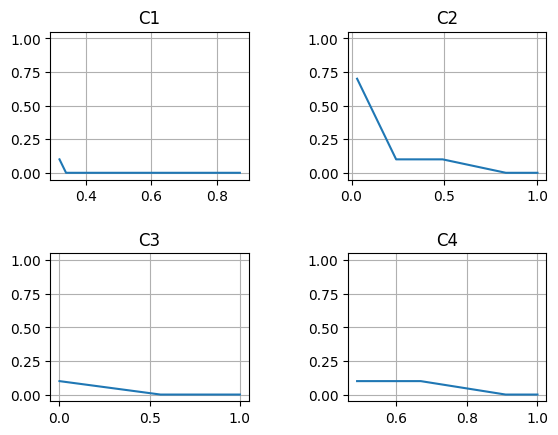

In [13]:
u1_xy = []
u2_xy = []
u3_xy = []
u4_xy = []
for var in prob.variables():
    if var.name == 'e':
        continue
    u, x = var.name.split('_')
    if u == 'u1':
        u1_xy.append((int(x)/100, var.varValue))
    elif u == 'u2':
        u2_xy.append((int(x)/100, var.varValue))
    elif u == 'u3':
        u3_xy.append((int(x)/100, var.varValue))
    elif u == 'u4':
        u4_xy.append((int(x)/100, var.varValue))

u1_xy = sorted(u1_xy, key=lambda x: x[0])
u2_xy = sorted(u2_xy, key=lambda x: x[0])
u3_xy = sorted(u3_xy, key=lambda x: x[0])
u4_xy = sorted(u4_xy, key=lambda x: x[0])

u1_x, u1_y = zip(*u1_xy)
u2_x, u2_y = zip(*u2_xy)
u3_x, u3_y = zip(*u3_xy)
u4_x, u4_y = zip(*u4_xy)

for i, (x, y) in enumerate(zip([u1_x, u2_x, u3_x, u4_x], [u1_y, u2_y, u3_y, u4_y])):
    plt.subplot(2,2,i+1)
    plt.plot(x, y)
    plt.title(f'C{i+1}')
    plt.ylim(-0.05, 1.05)
    plt.grid(True)
plt.subplots_adjust(hspace=0.5, wspace=0.5)

## Obliczenie ostatecznego rankingu


In [15]:
interpolate_u1 = interp1d(u1_x, u1_y, kind='linear', fill_value="extrapolate")
interpolate_u2 = interp1d(u2_x, u2_y, kind='linear', fill_value="extrapolate")
interpolate_u3 = interp1d(u3_x, u3_y, kind='linear', fill_value="extrapolate")
interpolate_u4 = interp1d(u4_x, u4_y, kind='linear', fill_value="extrapolate")

def calculate_utility(row):
    u1_utility = interpolate_u1(row['C1'])
    u2_utility = interpolate_u2(row['C2'])
    u3_utility = interpolate_u3(row['C3'])
    u4_utility = interpolate_u4(row['C4'])
    return u1_utility + u2_utility + u3_utility + u4_utility

df['utility'] = df.apply(calculate_utility, axis=1)

df_sorted = df.sort_values(by='utility', ascending=False)

df_sorted['rank'] = df_sorted['utility'].rank(method='min', ascending=False)

print(df_sorted)

      C1    C2    C3    C4   utility  rank
24  0.73  0.03  1.00  0.63  0.800000   1.0
15  0.87  0.03  1.00  0.61  0.800000   1.0
27  0.80  0.06  1.00  0.67  0.714286   3.0
18  0.76  0.06  1.00  0.60  0.714286   3.0
20  0.64  0.22  0.81  0.65  0.257143   5.0
11  0.61  0.54  0.38  0.49  0.217437   6.0
8   0.64  0.44  0.54  0.54  0.203571   7.0
2   0.66  0.55  0.45  0.49  0.201996   8.0
26  0.71  0.25  0.88  0.67  0.200000   9.0
22  0.32  0.83  0.00  0.94  0.200000   9.0
21  0.83  0.25  0.80  0.65  0.200000   9.0
17  0.68  0.40  0.65  0.60  0.200000   9.0
14  0.69  0.49  0.56  0.61  0.200000   9.0
12  0.74  0.25  0.80  0.49  0.200000   9.0
9   0.65  0.30  0.71  0.55  0.200000   9.0
6   0.78  0.27  0.71  0.50  0.200000   9.0
5   0.62  0.40  0.56  0.50  0.200000   9.0
3   1.00  0.45  0.57  0.50  0.200000   9.0
23  0.59  0.24  0.70  0.63  0.200000  19.0
10  0.45  0.86  0.00  0.73  0.175000  20.0
1   0.60  0.93  0.00  0.73  0.175000  20.0
4   0.48  0.87  0.00  0.75  0.166667  22.0
7   0.40  0